In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')  # Use some nicer default colors
import random
from math import isnan
from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180
import numpy as np
!apt-get update && apt-get install -y python3-opencv
import cv2


Selecting previously unselected package automake.
Preparing to unpack .../015-automake_1%3a1.16.1-4_all.deb ...
Unpacking automake (1:1.16.1-4) ...
Selecting previously unselected package dbus-user-session.
Preparing to unpack .../016-dbus-user-session_1.12.20-0+deb10u1_amd64.deb ...
Unpacking dbus-user-session (1.12.20-0+deb10u1) ...
Selecting previously unselected package libdconf1:amd64.
Preparing to unpack .../017-libdconf1_0.30.1-2_amd64.deb ...
Unpacking libdconf1:amd64 (0.30.1-2) ...
Selecting previously unselected package dconf-service.
Preparing to unpack .../018-dconf-service_0.30.1-2_amd64.deb ...
Unpacking dconf-service (0.30.1-2) ...
Selecting previously unselected package dconf-gsettings-backend:amd64.
Preparing to unpack .../019-dconf-gsettings-backend_0.30.1-2_amd64.deb ...
Unpacking dconf-gsettings-backend:amd64 (0.30.1-2) ...
Selecting previously unselected package gdal-data.
Preparing to unpack .../020-gdal-data_2.4.0+dfsg-1_all.deb ...
Unpacking gdal-data (2.4.0+dfs

In [ ]:
def plot_coords(coords, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.gca().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y, color="black")
    plt.show()

In this function we can add evolution strategies. I've just added a very simple evolutionary strategy that is not very stochastic or good. It just replaces the value of the first key with 'FA'

In [ ]:
def evolve_transformations(transformations, p):
    keys = list(transformations.keys())
    # get a random key from the transformations list and change the value of that key
    for i in range(len(keys)):
        if random.random() >= p:
            key = keys[i] ##### Add a for loop to loop over all keys in len(keys)
            transformations[key] = 'FA'
    return transformations

In [ ]:
def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

In [ ]:
def transform_multiple_evolve(sequence, transformations, iterations, p):
    '''Tranforms for multiple iterations'''
    for _ in range(iterations):
        #print(sequence, transformations, '\n')
        transformations = evolve_transformations(transformations, p)
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [ ]:
def transform_multiple(sequence, transformations, iterations):
    '''Tranforms for multiple iterations'''
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [ ]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

In [ ]:
def l_plot_evolve(axiom, transformations, iterations=0, angle=45, p=0.5):
    turtle_program = transform_multiple_evolve(axiom, transformations, iterations, p)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

In [ ]:
def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

Here you can see the difference between with and without evolution. If you run the evolve function a few times you'll see that it changes, the non-evolved one is deterministic. 

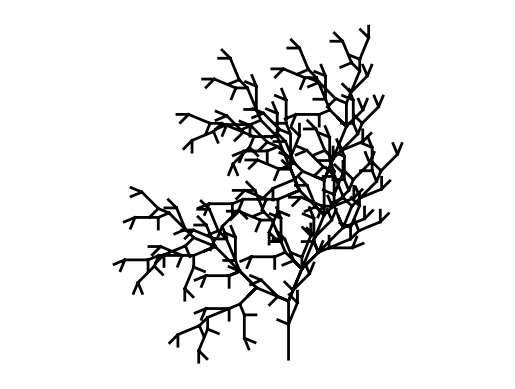

In [ ]:
l_plot_evolve('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

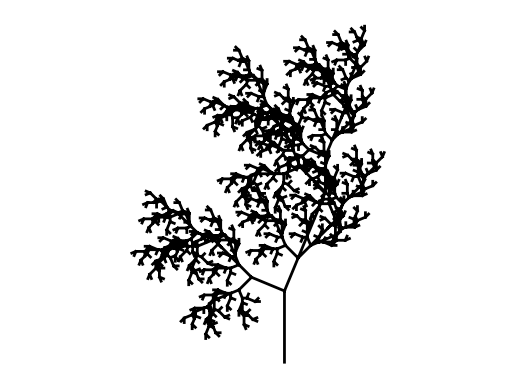

In [ ]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

### Assume&nbsp;that&nbsp;the&nbsp;goal&nbsp;is&nbsp;to replicate the tree above. Its genome is defined by the production rules. Its phenotype is the consequent turtle_program string which can be turned into a visual representation. 

## 1: Turtle program string phenotype

In [ ]:
#goal parameters
axiom = 'A'
transformations = {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'} 
iterations = 5
angle = 22.5
goal_program = transform_multiple(axiom, transformations, iterations)
coords_g = branching_turtle_to_coords(goal_program, angle)
X,Y = zip(*coords_g)
goal_nump = turn_coords_to_numpy(X,Y)
#ensure that it is not RGB anymore 
goal_img =  np.reshape(goal_nump[:,:,0],(480,640,1))




### 

## Initiate random rules.
1) Ensure that the rules are recursive (the same letters occur on the left hand side and the right hand side)
2) Correct grammar
3) Start with 2 rules



## Mutation and Cross-over
1) regional and small changes
2) encourage smaller rules by increasing the chance for reduction when the rules get longer
3) make sure both brackets of a corresponding tree are removed


## The Fitness function
1) Involve multiple simple metrics, since direct comparison of shapes is hard and costly
    - \% black and white
    - number of angles
    - length of rules used (prefer shorter rules)


In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from PIL import Image

def turn_coords_to_numpy(X,Y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.tight_layout(pad=0)

    # To remove the huge white borders
    ax.margins(0)
    ax.plot(X,Y, color="black")
    ax.axis('off')

    fig.canvas.draw()       # draw the canvas, cache the renderer
    plt.close()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return image

In [ ]:
def calculate_fitness(X,Y, optimal):
    '''
    solution: solution produced by the current rules (in string form)

    '''
    nump_sol = turn_coords_to_numpy(X,Y)
    nump_sol = np.reshape(nump_sol[:,:,0],(480,640,1))
    fitness = cv2.matchShapes(nump_sol,optimal,cv2.CONTOURS_MATCH_I1,0)
    return fitness

    
    


In [ ]:
# the fitness of the goal shape is 0,
# therefore it ought to be  minimalised
print(calculate_fitness(X,Y,goal_img))

0.0


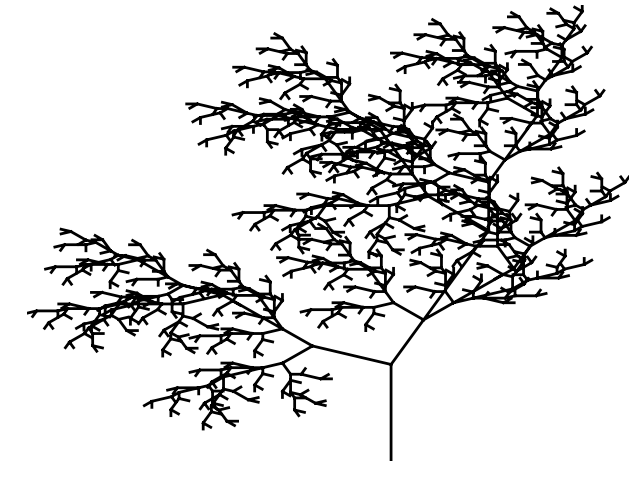

In [ ]:
#show goal nump
img = Image.fromarray(goal_nump, 'RGB')
img.show()

## Evolving new rules for x generations


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48486dc9-a1a6-4dac-ab77-4156e0b947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>